# Project Proposal 1 - Melbourne Property Market Analysis

The Objective of this study is to look into and gain insights into the Melbourne Real Estate  market by examining different viewpoints and elements that influence property values. The research utilises a dataset sourced from Kaggle, Geoapify  compromising information on property transactions within the Melbourne City Region.

Bich's Analysis: Age as a Variable: Examining the Influence of Building Age on Victorian Property Values and Its Consistency Across All Suburbs

Null hypothesis: There is no correlation between housing pricing and age of building. 
Alternate Hypothesis: There is significant correlation between housing pricing and age of building. 

Based on the data there were 330 unique suburbs in the dataset with a radius ranging out to a maximum of 48.1km from Melbourne CBD. Given the age of Melbourne and rapid development of high density residential housing around the CDB, the project team felt it important to focus on analysing this area and excluding regional Victoria within in the analysis. 

In the initial analysis of median housing price sales compared to the year of being built, the linear regression trend was negative, the r-squared value is 0.093 which is indicating there is a low level of dependence correlation between the two variables. 

Further analysis was undertaken to determine the variability as a function of distance to Melbourne CBD, a key contributing factor was the gold rush in the 1850s (source: https://en.wikipedia.org/wiki/History_of_Melbourne) suggesting the prime real estate, closest in distance to the CBD would be higher in value. Although this theory would also serve as a compelling, analysing bar graph and scatter plot, this would suggest such a relation, however the r-squared value is once again low at 0.022.

A third analysis was conducted by binning the distances of residential homes by distances to CBD, this showed interesting trends. Towards 30-50kms distance from the CBD, the box plots were rather tight, the inter quartile ranges were small and with no outliers. However, the greatest outliers were shown in distances from the CBD; 0-10km, 10-20km and thirdly by 20-30kms. These three range buckets also showed positively skewed results with a longer upper whisker. The team wanted to analyse the pre and post covid impacts as it is well known the house pricing in Melbourne CBD dropped significantly during the pandemic (source: https://fbe.unimelb.edu.au/newsroom/the-impact-of-covid-19-on-australias-housing-market),  however the data was truncated at 2017. This opens the opportunity for future analysis. 


In [67]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import datetime
from scipy import stats
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import pearsonr
import seaborn as sns

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

import plotly.io as pio 
pio.renderers.default = 'vscode'


In [68]:
# Create properties dataframe
mel_sales_df = pd.read_csv('Resources/Property Sales of Melbourne City.csv')
mel_sales_df = mel_sales_df.drop(['Unnamed: 0'], axis=1)

# Display sample data
mel_sales_df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [69]:
mel_sales_df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price              int64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [70]:
# Count how many unique suburbs in Vic
unique_count = mel_sales_df['Suburb'].nunique()
unique_count

330

In [71]:
# Calculate the greatest distance from CBD
max_dist = mel_sales_df['Distance'].max()
max_dist

48.1

In [72]:
# Data clean to remove Nan in Year Built
agedrop_df = mel_sales_df.dropna(how='any')
#check no blank values in data is complete
agedrop_df.count()

Suburb           6196
Address          6196
Rooms            6196
Type             6196
Price            6196
Method           6196
SellerG          6196
Date             6196
Distance         6196
Postcode         6196
Bedroom2         6196
Bathroom         6196
Car              6196
Landsize         6196
BuildingArea     6196
YearBuilt        6196
CouncilArea      6196
Lattitude        6196
Longtitude       6196
Regionname       6196
Propertycount    6196
dtype: int64

In [73]:
#Year built convert float to int
agedrop_df = agedrop_df.astype({"YearBuilt": int}, errors='raise')
agedrop_df['YearBuilt'].dtypes

dtype('int32')

In [74]:
# Rename columns 
agedrop_df.describe

<bound method NDFrame.describe of              Suburb          Address  Rooms Type    Price Method  \
1        Abbotsford  25 Bloomburg St      2    h  1035000      S   
2        Abbotsford     5 Charles St      3    h  1465000     SP   
4        Abbotsford      55a Park St      4    h  1600000     VB   
6        Abbotsford     124 Yarra St      3    h  1876000      S   
7        Abbotsford    98 Charles St      2    h  1636000      S   
...             ...              ...    ...  ...      ...    ...   
15388    Whittlesea    30 Sherwin St      3    h   601000      S   
15389  Williamstown      75 Cecil St      3    h  1050000     VB   
15390  Williamstown    2/29 Dover Rd      1    u   385000     SP   
15392       Windsor  201/152 Peel St      2    u   560000     PI   
15395    Yarraville  54 Pentland Pde      6    h  2450000     VB   

             SellerG        Date  Distance  Postcode  ...  Bathroom  Car  \
1             Biggin   4/02/2016       2.5    3067.0  ...       1.0  0.0 

y = -5397.48x + 11669921.62
The r-squared is: 0.09280098096732935


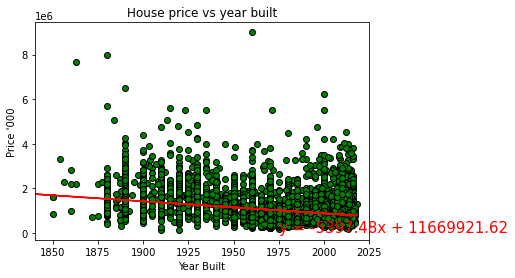

In [75]:
# x-y scatter, calculating the line equation amd r-squared value - year built by price
x_values = year = agedrop_df['YearBuilt']
y_values = price = agedrop_df['Price']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

plt.scatter(agedrop_df['YearBuilt'],agedrop_df['Price'], marker="o", facecolors="green", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1975,8000),fontsize=15,color="red")
plt.xlabel("Year Built")
plt.ylabel("Price '000")
plt.title("House price vs year built")
plt.xlim(1840,2025)

print(f"The r-squared is: {rvalue**2}")
plt.savefig('Graphs/pricevyear.jpg')
plt.show()

In [76]:
print(f"The correlation coefficient between house price and year built is {round(st.pearsonr(year,price)[0],2)}")

The correlation coefficient between house price and year built is -0.3


y = -17909.34x + 1243463.96
The r-squared is: 0.02216133793008235


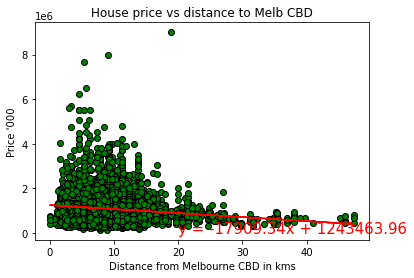

In [77]:
# x-y scatter, calculating the line equation amd r-squared value - year built by distnace to CDB
x_values = year = agedrop_df['Distance']
y_values = price = agedrop_df['Price']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

plt.scatter(agedrop_df['Distance'],agedrop_df['Price'], marker="o", facecolors="green", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,4),fontsize=15,color="red")
plt.xlabel("Distance from Melbourne CBD in kms")
plt.ylabel("Price '000")
plt.title("House price vs distance to Melb CBD")

print(f"The r-squared is: {rvalue**2}")
plt.savefig('Graphs/pricevdist_scatter.jpg')
plt.show()

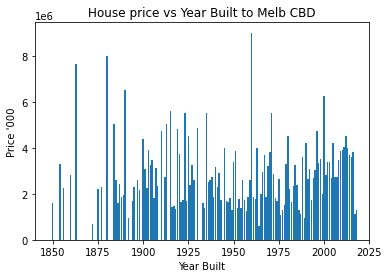

In [78]:
# knowing CBD builds out,typically year built is older by CBD, hence order dataset by Year Built from CBD and see the correlation
#year_builtdrop_df = pd.DataFrame('YearBuilt')

# Sort the DataFrame by the 'Values' column in descending order
year_builtdrop_df = agedrop_df.sort_values(by='YearBuilt', ascending=False)
year_builtdrop_df
# Plot the data
plt.bar(year_builtdrop_df['YearBuilt'], year_builtdrop_df['Price'])
plt.xlabel("Year Built")
plt.ylabel("Price '000")
plt.title("House price vs Year Built to Melb CBD")
plt.xlim(1840,2025)

# Show the plot
plt.savefig('Graphs/pricevyearbuilt_bar.jpg')
plt.show()

In [79]:
# Group year built in buckets and draw box plots
agedrop_df_group = agedrop_df.groupby(["Distance"])
agedrop_df_group.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910,Yarra,-37.80240,144.99930,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890,Yarra,-37.80600,144.99540,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15245,Melbourne,709/87 Franklin St,2,u,565000,S,MICM,29/07/2017,0.0,3000.0,...,1.0,0.0,89.0,85.0,2003,Melbourne,-37.80802,144.96168,Northern Metropolitan,17496.0
15263,Mooroolbark,149 Manchester Rd,3,h,696000,S,Fletchers,29/07/2017,26.5,3138.0,...,1.0,2.0,886.0,120.0,1960,Yarra Ranges,-37.77530,145.31266,Eastern Victoria,8280.0
15385,Westmeadows,43 Bamford Av,4,h,821000,S,YPA,29/07/2017,16.5,3049.0,...,3.0,2.0,544.0,264.0,1997,Hume,-37.67841,144.87924,Northern Metropolitan,2474.0
15386,Westmeadows,4 Pershore Ct,3,h,635000,S,Barry,29/07/2017,16.5,3049.0,...,2.0,1.0,691.0,177.0,1975,Hume,-37.68026,144.88468,Northern Metropolitan,2474.0


In [80]:
bin_df = agedrop_df['Distance']

# Define bin edges
bin_edges = [0, 10, 20, 30, 40, 50]

# Create bin labels
bin_labels = ['0-10', '11-20', '21-30', '31-40', '41-50']

# Create a new column with bin labels
agedrop_df["bin"] = pd.cut(agedrop_df['Distance'], bins=bin_edges, labels=bin_labels)

# Display the DataFrame
agedrop_df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,bin
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/02/2016,2.5,3067.0,...,0.0,156.0,79.0,1900,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,0-10
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/03/2017,2.5,3067.0,...,0.0,134.0,150.0,1900,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,0-10
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/06/2016,2.5,3067.0,...,2.0,120.0,142.0,2014,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0,0-10
6,Abbotsford,124 Yarra St,3,h,1876000,S,Nelson,7/05/2016,2.5,3067.0,...,0.0,245.0,210.0,1910,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0,0-10
7,Abbotsford,98 Charles St,2,h,1636000,S,Nelson,8/10/2016,2.5,3067.0,...,2.0,256.0,107.0,1890,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0,0-10


In [81]:
# agedrop_df_grouped = agedrop_df.groupby('bin')
# print(agedrop_df_grouped)
# Create empty list to fill with data (for plotting)

pricing_distance = []

for distance in bin_labels :
    
    data = agedrop_df[agedrop_df["bin"] == distance]
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # add subset 
    pricing_distance.append(data["Price"])
        
    # Determine outliers using upper and lower bounds
    quartiles = data["Price"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = data.loc[(data["Price"] < lower_bound) | (data["Price"]  > upper_bound)][["Price","bin"]]
    if not outliers.empty:
        print(distance,"Outliers:" )
        print(outliers.to_string(index=False))
        
    print("")


0-10 Outliers:
  Price  bin
2850000 0-10
2615000 0-10
3010000 0-10
2800000 0-10
4735000 0-10
2840000 0-10
2801000 0-10
5525000 0-10
3625000 0-10
4200000 0-10
3512500 0-10
4000000 0-10
2800000 0-10
3270000 0-10
2730000 0-10
3290000 0-10
3401000 0-10
3020000 0-10
3230000 0-10
3300000 0-10
2614000 0-10
3250000 0-10
3690000 0-10
2910000 0-10
3360000 0-10
4000000 0-10
2650000 0-10
2608000 0-10
2700000 0-10
3400000 0-10
3300000 0-10
3225000 0-10
3320000 0-10
2750000 0-10
2740000 0-10
2950000 0-10
2900000 0-10
2620000 0-10
2930000 0-10
2950000 0-10
3550000 0-10
3400000 0-10
3145000 0-10
2950000 0-10
2718000 0-10
3010000 0-10
2806000 0-10
3572000 0-10
2800000 0-10
2620000 0-10
3310000 0-10
4011000 0-10
3400000 0-10
3400000 0-10
3730000 0-10
2850000 0-10
2975000 0-10
2825000 0-10
2825000 0-10
3085000 0-10
3860000 0-10
2625000 0-10
2725000 0-10
2800000 0-10
2950000 0-10
3365000 0-10
2670000 0-10
3225000 0-10
3950000 0-10
4250000 0-10
5050000 0-10
3750000 0-10
3550000 0-10
4850000 0-10
6500000 0-

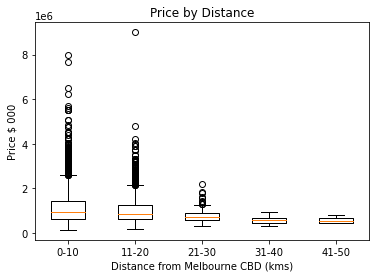

In [82]:
# Generate a box plot that shows the price by distance from CBD
fig1, ax1 = plt.subplots()
ax1.set_title("Price by Distance")
ax1.set_ylabel("Price $ 000")
ax1.set_xlabel("Distance from Melbourne CBD (kms)")
    
ax1.boxplot(pricing_distance, labels=bin_labels,  showfliers=True)
plt.savefig('Graphs/pricevdist_bins_box.jpg')
plt.show()

In [83]:
# Group year built in buckets and draw box plots
year_builtdrop_df_group = year_builtdrop_df.groupby(["YearBuilt"])

bin_df = year_builtdrop_df['YearBuilt']

# Define bin edges
bin_edges = [1800,1850,1900,1950,2000,2050]

# Create bin labels
bin_labels = ['1800-1849', '1850-1899', '1900-1949', '1949-1999', '2000-2050']

# Create a new column with bin labels
year_builtdrop_df["bin"] = pd.cut(year_builtdrop_df['YearBuilt'], bins=bin_edges, labels=bin_labels)

# Display the DataFrame
year_builtdrop_df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,bin
1630,Brighton East,8 Thomas St,2,h,1310000,S,Buxton,24/09/2016,10.7,3187.0,...,2.0,302.0,250.0,2018,Glen Eira,-37.91820,145.02310,Southern Metropolitan,6938.0,2000-2050
13714,Maidstone,19/8 Crefden St,2,u,435000,S,Biggin,8/07/2017,6.4,3012.0,...,1.0,0.0,96.0,2017,Maribyrnong,-37.77813,144.87287,Western Metropolitan,3873.0,2000-2050
14204,Pascoe Vale,17 Valerie St,3,h,1114000,S,Brad,12/08/2017,8.5,3044.0,...,2.0,256.0,190.0,2017,Moreland,-37.72034,144.93788,Northern Metropolitan,7485.0,2000-2050
6586,Reservoir,89 Darebin Bvd,4,h,767500,S,Barry,17/09/2016,11.2,3073.0,...,2.0,834.0,129.0,2017,Darebin,-37.70400,145.02990,Northern Metropolitan,21650.0,2000-2050
13807,Sandringham,154 Abbott St,4,h,850000,PI,McGrath,8/07/2017,15.2,3191.0,...,2.0,709.0,327.0,2017,Bayside,-37.95095,145.02096,Southern Metropolitan,4497.0,2000-2050


In [84]:
# year_builtdrop_df_grouped = year_builtdrop_df.groupby('bin')
# print(year_builtdrop_df_grouped)
# Create empty list to fill with data (for plotting)

pricing_year_built = []

for year_built in bin_labels :
    
   
    data = year_builtdrop_df[year_builtdrop_df["bin"] == year_built]
    # add subset 
    pricing_year_built.append(data["Price"])
        
    # Determine outliers using upper and lower bounds
    quartiles = data["Price"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = data.loc[(data["Price"] < lower_bound) | (data["Price"]  > upper_bound)][["Price","bin"]]
    if not outliers.empty:
        print(year_built,"Outliers:" )
        print(outliers.to_string(index=False))
        
    print("")


1850-1899 Outliers:
  Price       bin
4400000 1850-1899
3625000 1850-1899
3700000 1850-1899
3120000 1850-1899
3175000 1850-1899
3225000 1850-1899
3200000 1850-1899
3700000 1850-1899
3335000 1850-1899
4011000 1850-1899
3400000 1850-1899
6500000 1850-1899
3950000 1850-1899
3225000 1850-1899
4240000 1850-1899
3550000 1850-1899
5046000 1850-1899
8000000 1850-1899
5700000 1850-1899
7650000 1850-1899
3310000 1850-1899

1900-1949 Outliers:
  Price       bin
3400000 1900-1949
4000000 1900-1949
2900000 1900-1949
3175000 1900-1949
5525000 1900-1949
3270000 1900-1949
4000000 1900-1949
3200000 1900-1949
2850000 1900-1949
3550000 1900-1949
2950000 1900-1949
2975000 1900-1949
4200000 1900-1949
4850000 1900-1949
4250000 1900-1949
3401000 1900-1949
3105000 1900-1949
2806000 1900-1949
3270000 1900-1949
2950000 1900-1949
4525000 1900-1949
3730000 1900-1949
3365000 1900-1949
5500000 1900-1949
2920000 1900-1949
3200000 1900-1949
3750000 1900-1949
3400000 1900-1949
3400000 1900-1949
3001000 1900-1949
4802

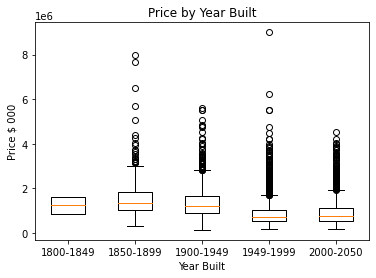

In [85]:
# Generate a box plot that shows the price by year built
fig1, ax1 = plt.subplots()
ax1.set_title("Price by Year Built")
ax1.set_ylabel("Price $ 000")
ax1.set_xlabel("Year Built")
    
ax1.boxplot(pricing_year_built, labels=bin_labels,  showfliers=True)
plt.savefig('Graphs/pricevyearbuilt_bins_box.jpg')
plt.show()

In [86]:
# Find the mean
price_mean = agedrop_df['Price'].mean()
random_sample = year_builtdrop_df.sample(n=2000)
year_mean = year_builtdrop_df['YearBuilt'].mean()
# Perform the one-sample t-test for distance
t_statistic, p_value = st.ttest_1samp(agedrop_df['Price'], price_mean)
# Perform the one-sample t-test for year built
year_t_statistic, year_p_value = st.ttest_1samp(random_sample['YearBuilt'], year_mean)

print(f"T-statistic for distance: {t_statistic}")
print(f"P-value for distance: {p_value}")
print(f"T-statistic for year built: {year_t_statistic}")
print(f"P-value for year built: {year_p_value}")

T-statistic for distance: 0.0
P-value for distance: 1.0
T-statistic for year built: -2.5856162386524026
P-value for year built: 0.009790690651807583


T-statistic: 0.0
P-value: 1.0


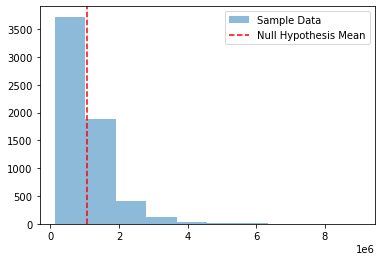

In [87]:
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# You can also create a histogram to visualize the data
plt.hist(agedrop_df['Price'], bins=10, alpha=0.5, label='Sample Data')
plt.axvline(x=price_mean, color='red', linestyle='--', label='Null Hypothesis Mean')
plt.legend()
plt.show()

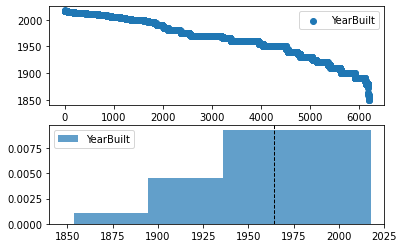

In [88]:
# Scatter Plot of Data
plt.subplot(2, 1, 1)
plt.scatter(range(len(year_builtdrop_df['YearBuilt'])), year_builtdrop_df['YearBuilt'], label="YearBuilt")
plt.ylim(1840,2025)
plt.legend()

# Histogram Plot of Data
plt.subplot(2, 1, 2)
plt.hist(year_builtdrop_df['YearBuilt'], 20, density=True, alpha=0.7, label="YearBuilt")
plt.axvline(year_builtdrop_df['YearBuilt'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.xlim(1840,2025)
plt.legend() 

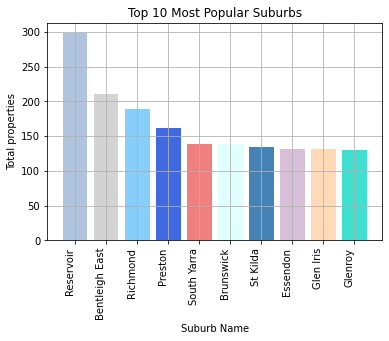

In [89]:
# Find the top 10 most popular suburbs
mel_sales_df['Year'] = mel_sales_df['Date'].apply(lambda date_str: date_str.split('/')[-1])
mel_sales_2016 = mel_sales_df.loc[mel_sales_df['Year'] == '2016']
sub_count=mel_sales_2016["Suburb"].value_counts().values[:10]
sub_name=mel_sales_2016["Suburb"].value_counts().head(10).index.tolist()

#colors
colors = ['lightsteelblue', 'lightgrey', 'lightskyblue', 'royalblue', 'lightcoral', 'lightcyan', 'steelblue', 'thistle','peachpuff','turquoise']


fig, x = plt.subplots()

# Plot the bar chart with different colors for each bar
x.bar(sub_name, sub_count, color=colors)

# Assign names to the figure
x.set_title('Top 10 Most Popular Suburbs')
x.set_ylabel('Total properties')
x.set_xlabel('Suburb Name')
plt.xticks(rotation=90, ha='right')
plt.grid()

# Save the figure
plt.savefig('Graphs/subs_bar.png', bbox_inches='tight')
plt.show()

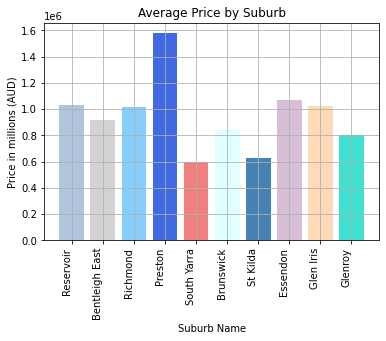

In [90]:
# Filter data by using top ten suburbs
sub_group=mel_sales_2016[mel_sales_2016["Suburb"].isin(sub_name)]
sub_price=sub_group.groupby("Suburb")["Price"].mean()
fig, x = plt.subplots()

# Plot the bar chart with different colors for each bar
x.bar(sub_name, sub_price, color=colors)

# Assign names to the figure
x.set_title('Average Price by Suburb')
x.set_ylabel('Price in millions (AUD)')
x.set_xlabel('Suburb Name')
plt.xticks(rotation=90, ha='right')
plt.grid()

# Save the figure
plt.savefig('Graphs/Price_Sub.png', bbox_inches='tight')
plt.show()

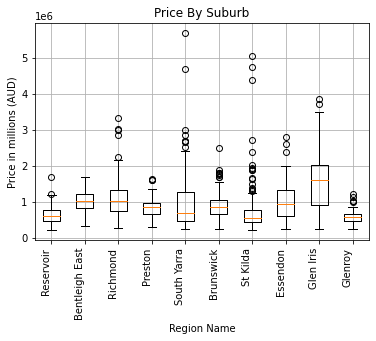

In [91]:
#filter out the dataframe using region name
df1=sub_group.loc[sub_group["Suburb"]==sub_name[0]]
df2=sub_group.loc[sub_group["Suburb"]==sub_name[1]]
df3=sub_group.loc[sub_group["Suburb"]==sub_name[2]]
df4=sub_group.loc[sub_group["Suburb"]==sub_name[3]]
df5=sub_group.loc[sub_group["Suburb"]==sub_name[4]]
df6=sub_group.loc[sub_group["Suburb"]==sub_name[5]]
df7=sub_group.loc[sub_group["Suburb"]==sub_name[6]]
df8=sub_group.loc[sub_group["Suburb"]==sub_name[7]]
df9=sub_group.loc[sub_group["Suburb"]==sub_name[8]]
df0=sub_group.loc[sub_group["Suburb"]==sub_name[9]]


#boxplot
Label=sub_name
results=[df1["Price"],df2["Price"],df3["Price"],df4["Price"],df5["Price"],df6["Price"],df7["Price"],df8["Price"],df9["Price"],df0["Price"]]
box_plot, region_plot=plt.subplots()
plt.xticks(rotation=90, ha='right')
region_plot.boxplot(results, labels=Label)

#Assign names to the figure
region_plot.set_title('Price By Suburb')
region_plot.set_ylabel('Price in millions (AUD)')
region_plot.set_xlabel('Region Name')

plt.grid()
plt.savefig('Graphs/box_plot', bbox_inches='tight')

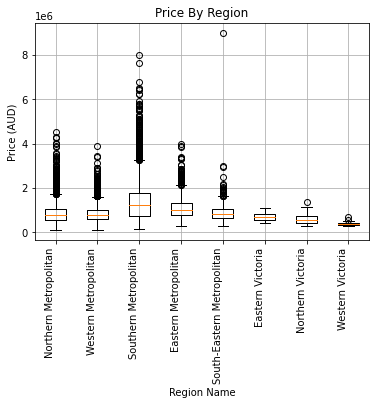

In [92]:
#filter out the dataframe using region name
all_region=mel_sales_df["Regionname"].unique()
df1=mel_sales_df.loc[mel_sales_df["Regionname"]==all_region[0]]
df2=mel_sales_df.loc[mel_sales_df["Regionname"]==all_region[1]]
df3=mel_sales_df.loc[mel_sales_df["Regionname"]==all_region[2]]
df4=mel_sales_df.loc[mel_sales_df["Regionname"]==all_region[3]]
df5=mel_sales_df.loc[mel_sales_df["Regionname"]==all_region[4]]
df6=mel_sales_df.loc[mel_sales_df["Regionname"]==all_region[5]]
df7=mel_sales_df.loc[mel_sales_df["Regionname"]==all_region[6]]
df8=mel_sales_df.loc[mel_sales_df["Regionname"]==all_region[7]]

#Find median
medians = [df["Price"].median() for df in [df1, df2, df3, df4, df5, df6, df7, df8]]

#boxplot
Label=['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Eastern Victoria',
       'Northern Victoria', 'Western Victoria']
results=[df1["Price"],df2["Price"],df3["Price"],df4["Price"],df5["Price"],df6["Price"],df7["Price"],df8["Price"]]
box_plot, region_plot=plt.subplots()
plt.xticks(rotation=90, ha='right')
region_plot.boxplot(results, labels=Label)

#Assign names to the figure
region_plot.set_title('Price By Region')
region_plot.set_ylabel('Price (AUD)')
region_plot.set_xlabel('Region Name')

plt.grid()
plt.savefig('Graphs/Ammar_Box_PlotByRegion', bbox_inches='tight')

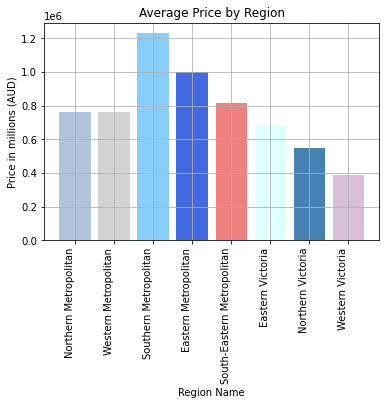

In [93]:
# Find the average price by region
# Select data
bar_results = medians
labels = Label
fig, x = plt.subplots()

# Plot the bar chart with different colors for each bar
x.bar(labels, bar_results, color=colors)

# Assign names to the figure
x.set_title('Average Price by Region')
x.set_ylabel('Price in millions (AUD)')
x.set_xlabel('Region Name')
plt.xticks(rotation=90, ha='right')
plt.grid()

# Save the figure
plt.savefig('Graphs/Ammar_AveragePriceByRegionBar_chart.png', bbox_inches='tight')
plt.show()

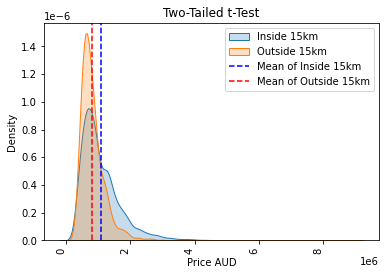

t-statistic: 19.113053516390284
p-value: 1.1895198924708595e-80


In [94]:
#T-test
inside_15km=mel_sales_df.loc[mel_sales_df["Distance"]<= 15]
outside_15km=mel_sales_df.loc[mel_sales_df["Distance"]> 15]
inside_col=inside_15km['Price']
outside_col=outside_15km['Price']

av_1=inside_col.mean()
av_2=outside_col.mean()


# Conduct independent t-test
t_stat, p_value = stats.ttest_ind(inside_col,outside_col)

# Plot using KDE plots
fig, ax = plt.subplots()
sns.kdeplot(inside_col, ax=ax, label='Inside 15km', shade=True)
sns.kdeplot(outside_col, ax=ax, label='Outside 15km', shade=True)
ax.axvline(x=np.mean(inside_col), color='blue', linestyle='--', label='Mean of Inside 15km')
ax.axvline(x=np.mean(outside_col), color='red', linestyle='--', label='Mean of Outside 15km')
plt.xticks(rotation=90, ha='right')

ax.set_xlabel('Price AUD')
ax.set_ylabel('Density')
ax.set_title('Two-Tailed t-Test')
ax.legend()
plt.show()

# Print the t-statistic and p-value
print('t-statistic:', t_stat)
print('p-value:', p_value)

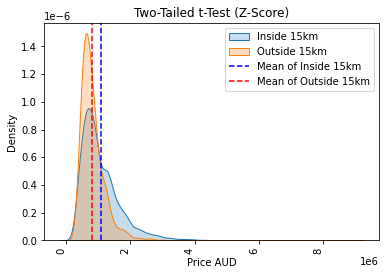

In [95]:
# Plot using KDE plots
fig, ax = plt.subplots()
sns.kdeplot(inside_col, ax=ax, label='Inside 15km', shade=True)
sns.kdeplot(outside_col, ax=ax, label='Outside 15km', shade=True)
ax.axvline(x=np.mean(inside_col), color='blue', linestyle='--', label='Mean of Inside 15km')
ax.axvline(x=np.mean(outside_col), color='red', linestyle='--', label='Mean of Outside 15km')
plt.xticks(rotation=90, ha='right')

# Remove outliers using z-score (Outside)
z_scores = stats.zscore(inside_col)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
inside_col = inside_col[filtered_entries]

# Remove outliers using z-score (Inside)
z_scores = stats.zscore(outside_col)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
outside_col = outside_col[filtered_entries]

ax.set_xlabel('Price AUD')
ax.set_ylabel('Density')
ax.set_title('Two-Tailed t-Test (Z-Score)')
ax.legend()
plt.show()